In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Lectura de imágenes

In [2]:
raw_data_path = '../../../../eigenfaces/rawdata/'
ROWS = 128
COLS = 128

In [3]:
def read_image(path, img_file, ROWS, COLS):
    fin = open(path + img_file)
    img = np.fromfile(fin, dtype=np.uint8, count=ROWS*COLS)
    img.shape = (img.size // COLS, COLS)
    return img

def read_images_from(path, ROWS=128, COLS=128):
    dir_contents = os.listdir(path)
    dir_contents = [c for c in dir_contents if c[0] != '.']
    dir_contents = sorted(dir_contents)
    images = []
    for img_name in dir_contents:
        images.append(read_image(path, img_name, ROWS, COLS))
    return images

def show_image(img, cmap='gray', name=None):
    if name is not None: plt.title(name)
    plt.imshow(img, cmap)
    plt.show()

def show_images(images, cmap='gray'):
    fig = plt.figure(figsize=(10,5))
    rows, cols = 1, len(images)
    for idx, image in enumerate(images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image, cmap)
    plt.show()

In [4]:
face_images = read_images_from(raw_data_path, ROWS, COLS)
print(f'Num images: {len(face_images)}')

Num images: 3993


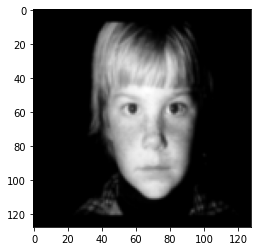

In [5]:
show_image(face_images[1])

# Preprocesamiento de imágenes

In [6]:
import sys

In [7]:
min_rows, min_cols = sys.maxsize, sys.maxsize
max_rows, max_cols = 0, 0
for (i, image) in enumerate(face_images):
    r, c = image.shape
    min_rows = min(min_rows, r)
    max_rows = max(max_rows, r)
    min_cols = min(min_cols, c)
    max_cols = max(max_cols, c)
    
print("\n==> Least common image size:", min_rows, "x", min_cols, "pixels")


==> Least common image size: 128 x 128 pixels


In [8]:
def recenter(image, min_rows, min_cols):
    r, c = image.shape
    top, bot, left, right = 0, r, 0, c
    if r > min_rows:
        top = r - min_rows  
    if c > min_cols:
        right = min_cols     
    return image[top:bot, left:right]

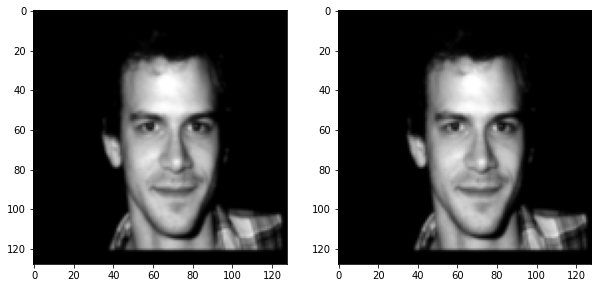

In [19]:
image0 = face_images[1000]
image0_recentered = recenter(image0, min_rows, min_cols)
show_images([image0, image0_recentered])

### Cara promedio

In [22]:
def get_avg_image(images): 
    return np.mean(images, axis=0)

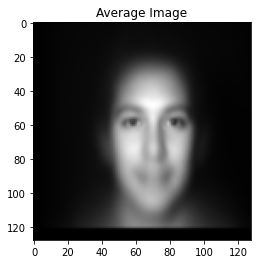

In [23]:
avg_image = get_avg_image(face_images)
show_image(avg_image, name='Average Image')

### Imágenes centradas

In [30]:
def center_image(image, avg_image):
    return image-avg_image

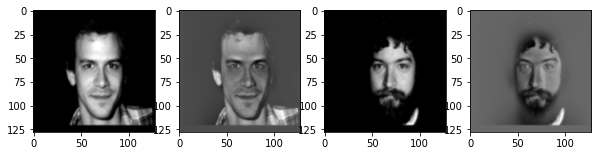

In [31]:
centered_images = [
    image0,
    center_image(image0, avg_image),
    face_images[1200],
    center_image(face_images[1200], avg_image)
]
show_images(centered_images)

### Matriz de Datos

In [37]:
def images_to_2d(face_images):
    m = len(face_images)
    d = min_rows * min_cols
    return np.reshape(face_images, (m,d))

def image_from_3d(X):
    return np.reshape(
        X[int(len(X)/2), :],
        (min_rows, min_cols)
    )

(3993, 16384)


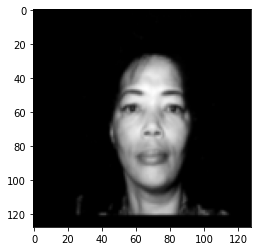

In [73]:
X = images_to_2d(face_images)
print(X.shape)
show_image(image_from_3d(X))

### PCA


In [46]:
import plotly.graph_objects as go

In [41]:
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

In [42]:
print("X:", X.shape)
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("V^T:", VT.shape)

X: (3993, 16384)
U: (3993, 3993)
Sigma: (3993,)
V^T: (3993, 16384)


In [64]:
x = np.arange(1, Sigma.shape[0])

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=Sigma[0]/np.sqrt(x),
    name='sigma_0/sqrt(x)'
))
fig.add_trace(go.Scatter(
    x=np.arange(Sigma.shape[0]),
    y=Sigma,
    mode='markers', name='Singular Values'
))
fig.update_layout(
    template='plotly_white',
    title=dict(
        text='Singular values'
    )
)
fig.show()

In [80]:
def get_n_principal_components(n, VT):
    images = []
    d = int(np.sqrt(VT[0].shape[0]))
    for i in range(n):
        images.append(VT[i].reshape(d,d))
    return images

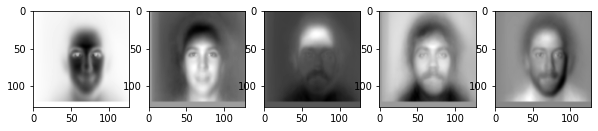

In [83]:
principal_components = get_n_principal_components(5, VT)
show_images(principal_components)